# PROJECT - CREDIT CARD SEGMENTATION

## Problem Statement

*    *This case requires trainees to develop a customer segmentation to define marketing strategy. The sample dataset summarizes the usage behaviour of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioural variables.*

<img src='https://www.centreviews.com/wp-content/uploads/2018/11/ss_4107146921.jpg' alt='Credit-cards'>

### Goals of Model:

***Advanced data preparation:*** Build an ‘enriched’ customer profile by deriving “intelligent” KPIs such as:
<ol>  
    
<li>  Monthly average purchase and cash advance amount.
    
    
<li>  Purchases by type (one-off, installments).
    
    
<li>  Average amount per purchase and cash advance transaction.
    
    
<li>  Limit usage (balance to credit limit ratio).
    
    
<li>  Payments to minimum payments ratio etc.
    
    
<li>  Advanced reporting: Use the derived KPIs to gain insight on the customer profiles.
    
    
<li>  Identification of the relationships/ affinities between services.
    
    
<li>  Clustering: Apply a data reduction technique factor analysis for variable reduction technique and a clustering algorithm  to reveal the behavioural segments of credit card holders
    
    
<li>  Identify cluster characterisitics of the cluster using detailed profiling.
    
    
<li>  Provide the strategic insights and implementation of strategies for given set of cluster characteristics
    
</ol>

### DATA DICTIONARY:

* ***CUST_ID:*** Credit card holder ID


* ***BALANCE:*** Monthly average balance (based on daily balance averages)


* ***BALANCE_FREQUENCY:*** Ratio of last 12 months with balance


* ***PURCHASES:*** Total purchase amount spent during last 12 months


* ***ONEOFF_PURCHASES:*** Total amount of one-off purchases


* ***INSTALLMENTS_PURCHASES:*** Total amount of installment purchases


* ***CASH_ADVANCE:*** Total cash-advance amount


* ***PURCHASES_ FREQUENCY:*** Frequency of purchases (Percent of months with at least one purchase)


* ***ONEOFF_PURCHASES_FREQUENCY:*** Frequency of one-off-purchases 


* ***PURCHASES_INSTALLMENTS_FREQUENCY:*** Frequency of installment purchases


* ***CASH_ADVANCE_ FREQUENCY:*** Cash-Advance frequency


* ***AVERAGE_PURCHASE_TRX:*** Average amount per purchase transaction


* ***CASH_ADVANCE_TRX:*** Average amount per cash-advance transaction


* ***PURCHASES_TRX:*** Average amount per purchase transaction


* ***CREDIT_LIMIT:*** Credit limit


* ***PAYMENTS:*** Total payments (due amount paid by the customer to decrease their statement balance) in the period


* ***MINIMUM_PAYMENTS:*** Total minimum payments due in the period.


* ***PRC_FULL_PAYMEN:*** Percentage of months with full payment of the due statement balance

* ***TENURE:*** Number of months as a customer

### Importing Library

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Basic python library for Data processing
import pandas as pd
import numpy as np

In [3]:
#Library for Visualiztion
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn
%matplotlib inline

In [4]:
# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(precision=3)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

### Loading data

In [5]:
# reading data into dataframe
df= pd.read_csv("credit-card-data.csv")

### Information about Creadit card Data set

In [6]:
df.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [8]:
# Find the total number of missing values in the dataframe
print("\nMissing values along rows :  ", df.isnull().sum().values.sum())


Missing values along rows :   314


In [9]:
# printing total numbers of Unique value in the dataframe. 
print("Unique values :\n",df.nunique())

Unique values :
 CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64


In [10]:
df.shape

(8950, 18)

In [11]:
# Intital descriptive analysis of data.
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


---

### 1. Missing Value Treatment
       - Since there are missing values in the data so we are imputing them with median.

---

In [12]:
df.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [13]:
# CREDIT_LIMIT  and MINIMUM_PAYMENTS has missing values so we need to remove with median.

df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(),inplace=True)

df['CREDIT_LIMIT'].count()

df['MINIMUM_PAYMENTS'].median()
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace=True)


In [14]:
# Now again check the missing values.
df.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

### Deriving New KPI

***1. Monthly average purchase and cash advance amount***

#### Monthly_avg_purchase

In [15]:
df['Monthly_avg_purchase']=df['PURCHASES']/df['TENURE']

In [16]:
print(df['Monthly_avg_purchase'].head())
print(df['PURCHASES'].head())
print(df['TENURE'].head())

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64
0      95.40
1       0.00
2     773.17
3    1499.00
4      16.00
Name: PURCHASES, dtype: float64
0    12
1    12
2    12
3    12
4    12
Name: TENURE, dtype: int64


#### Monthly_cash_advance Amount

In [17]:
df['Monthly_cash_advance']=df['CASH_ADVANCE']/df['TENURE']

In [18]:
print(df['Monthly_cash_advance'].head())
print(df['CASH_ADVANCE'].head())
print(df['TENURE'].head())

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: Monthly_cash_advance, dtype: float64
0       0.000000
1    6442.945483
2       0.000000
3     205.788017
4       0.000000
Name: CASH_ADVANCE, dtype: float64
0    12
1    12
2    12
3    12
4    12
Name: TENURE, dtype: int64


#### 2- Purchases by type (one-off, installments)

- To find what type of purchases customers are making on credit card

In [19]:
print(df[df['ONEOFF_PURCHASES']==0]['ONEOFF_PURCHASES'].count())
print(df[df['ONEOFF_PURCHASES']>0]['ONEOFF_PURCHASES'].count())

4302
4648


In [20]:
df.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
...,...,...
8945,0.00,291.12
8946,0.00,300.00
8947,0.00,144.40
8948,0.00,0.00


#### Find customers ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES details

In [21]:
df[(df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 20)

In [22]:
df[(df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 20)

In [23]:
df[(df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 20)

In [24]:
df[(df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 20)

***As per dataset we can categorize dataset into 4 types of purchases behaviour in the data set.***
<ol>
                    <li>People who only do One-Off Purchases.
                    <li>People who only do Installments Purchases.
                    <li>People who do both.
                    <li>People who do none.
</ol>    

***So we need to derive a categorical variable based on their behaviour***

In [25]:
def purchase(df):
    if (df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment_purchases'
    if (df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']==0):
        return 'one_off_purchases'
    if (df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']>0):
        return 'installment_purchases'

In [26]:
df['purchase_type']=df.apply(purchase,axis=1)

In [27]:
df['purchase_type'].value_counts()

both_oneoff_installment_purchases    2774
installment_purchases                2260
none                                 2042
one_off_purchases                    1874
Name: purchase_type, dtype: int64

#### 3. Average amount per purchase and cash advance transaction

In [28]:
#Average amount per purchase
df['PURCHASES'].mean()

1003.2048335195564

In [29]:
#Average amount per cash advance transaction
df['CASH_ADVANCE_TRX'].mean()

3.2488268156424582

#### 4. Limit_usage (balance to credit limit ratio )
   - Lower value implies to customers that are maintaining their balance properly. Lower value means good credit score

In [30]:
df['limit_usage']=df['BALANCE']/df['CREDIT_LIMIT']

In [31]:
df['limit_usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

#### 5. Payments to minimum payments ratio etc.

In [32]:
print(df['PAYMENTS'].isnull().any())
df['MINIMUM_PAYMENTS'].isnull().any()

False


False

In [33]:
df['payment_minpay']=df['PAYMENTS']/df['MINIMUM_PAYMENTS']
df['payment_minpay']

0       1.446508
1       3.826241
2       0.991682
3       0.000000
4       2.771075
          ...   
8945    6.660231
8946    0.883197
8947    0.986076
8948    0.942505
8949    0.715439
Name: payment_minpay, Length: 8950, dtype: float64

####  Extreme value Treatment
- Since there are variables having extreme values so I am doing log-transformation on the dataset to remove outlier effect 

In [34]:
# log tranformation
df_log=df.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

In [35]:
df_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,8.094825,6.624540,5.916079,0.117730,2.519680,3.050877,2.163970,0.296081,1.357600
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,0.819629,1.591763,1.169929,0.211617,0.130367,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949,1.481458,0.000000,0.040656,0.648817
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,8.006701,6.754489,5.747301,0.000000,2.564949,3.494587,0.000000,0.264455,1.109459
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,8.779711,7.550732,6.671670,0.133531,2.564949,4.587295,4.606022,0.540911,1.953415
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,2.827902,8.830767


In [36]:
df_log.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949,2.191654,0.000000,0.040086,0.894662
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949,0.000000,6.287695,0.376719,1.574068
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,5.747301,0.000000,2.564949,4.835620,2.898616,0.200671,0.000000
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949,0.847298,0.000000,0.519644,1.327360


In [37]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','PAYMENTS','CREDIT_LIMIT','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']
df_pre=df_log[[x for x in df_log.columns if x not in col ]]

In [38]:
print(df_pre.columns)

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay'],
      dtype='object')


In [39]:
df_log.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_avg_purchase', 'Monthly_cash_advance', 'limit_usage',
       'payment_minpay'],
      dtype='object')

### Insights from KPIs

#### Average payment_minpayment ratio for each purchse type.

In [40]:
x=df.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay']))
print(type(x))
x.values

<class 'pandas.core.series.Series'>


array([ 7.237, 13.259, 10.087,  5.571])

In [41]:
len(x)

4

Text(0.5, 1.0, 'Mean payment_minpayment ratio for each purchase type')

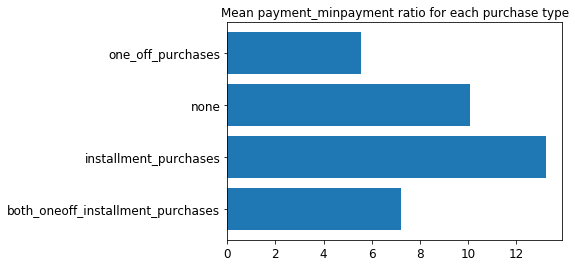

In [42]:
fig,ax=plt.subplots()
ax.barh(y=range(len(x)), width=x.values,align='center')
ax.set(yticks= np.arange(len(x)),yticklabels = x.index);
plt.title('Mean payment_minpayment ratio for each purchase type')

In [43]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318,86.175173,88.977984,0.388884,9.059164
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331,180.508787,193.136115,0.389722,118.180526
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,3.399375,0.000000,0.041494,0.913275
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000,31.936667,0.000000,0.302720,2.032717
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000,97.228333,99.085196,0.717571,6.052729
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,4086.630833,3928.100980,15.909951,6840.528861


#### customers with installment purchases are paying dues 

In [44]:
df[df['purchase_type']=='n']

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,purchase_type,limit_usage,payment_minpay


Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type')

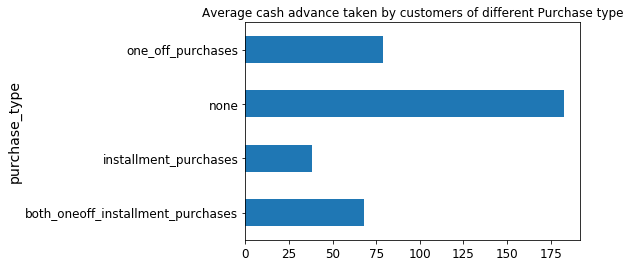

In [45]:
df.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()

plt.title('Average cash advance taken by customers of different Purchase type')

#### Customers who don't do either one-off or installment purchases take more cash on advance

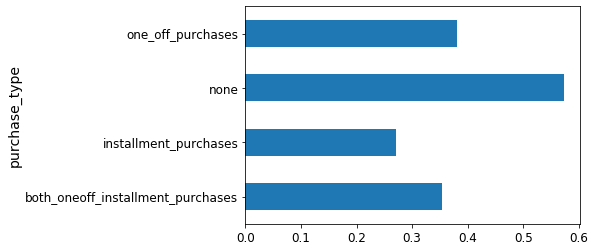

In [46]:
df.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()

#### Original dataset with categorical column converted to number type.

In [47]:
df_original=pd.concat([df,pd.get_dummies(df['purchase_type'])],axis=1)
df_original.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,purchase_type,limit_usage,payment_minpay,both_oneoff_installment_purchases,installment_purchases,none,one_off_purchases
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,installment_purchases,0.040901,1.446508,0,1,0,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,none,0.457495,3.826241,0,0,1,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,one_off_purchases,0.332687,0.991682,0,0,0,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,one_off_purchases,0.222223,0.000000,0,0,0,1
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,one_off_purchases,0.681429,2.771075,0,0,0,1


### Preparing Machine learning algorithm

***We do have some categorical data which need to convert with the help of dummy creation***

In [48]:
# creating Dummies for categorical variable
df_pre['purchase_type']=df.loc[:,'purchase_type']
p_type_dummies=pd.get_dummies(df_pre['purchase_type'])
p_type_dummies

,both_oneoff_installment_purchases,installment_purchases,none,one_off_purchases
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
8945,0,1,0,0
8946,0,1,0,0
8947,0,1,0,0
8948,0,0,1,0


#### Now merge the created dummy with the original data frame

In [49]:
df_dummy=pd.concat([df_pre,p_type_dummies],axis=1)
df_dummy

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,purchase_type,both_oneoff_installment_purchases,installment_purchases,none,one_off_purchases
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662,installment_purchases,0,1,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068,none,0,0,1,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,one_off_purchases,0,0,0,1
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.200671,0.000000,one_off_purchases,0,0,0,1
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,0.519644,1.327360,one_off_purchases,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.693147,0.000000,5.677165,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,3.902377,0.000000,0.028095,2.036042,installment_purchases,0,1,0,0
8946,0.693147,0.000000,5.707110,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,3.931826,0.000000,0.019002,0.632971,installment_purchases,0,1,0,0
8947,0.606136,0.000000,4.979489,0.606136,0.000000,0.510826,0.000000,0.000000,1.791759,3.221539,0.000000,0.023129,0.686161,installment_purchases,0,1,0,0
8948,0.606136,0.000000,0.000000,0.000000,0.000000,0.000000,0.154151,1.098612,0.000000,0.000000,1.959127,0.026559,0.663978,none,0,0,1,0


In [50]:
df_dummy=df_dummy.drop(['purchase_type'],axis=1)
df_dummy.isnull().any()

BALANCE_FREQUENCY                    False
ONEOFF_PURCHASES                     False
INSTALLMENTS_PURCHASES               False
PURCHASES_FREQUENCY                  False
ONEOFF_PURCHASES_FREQUENCY           False
PURCHASES_INSTALLMENTS_FREQUENCY     False
CASH_ADVANCE_FREQUENCY               False
CASH_ADVANCE_TRX                     False
PURCHASES_TRX                        False
Monthly_avg_purchase                 False
Monthly_cash_advance                 False
limit_usage                          False
payment_minpay                       False
both_oneoff_installment_purchases    False
installment_purchases                False
none                                 False
one_off_purchases                    False
dtype: bool

In [51]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
BALANCE_FREQUENCY                    8950 non-null float64
ONEOFF_PURCHASES                     8950 non-null float64
INSTALLMENTS_PURCHASES               8950 non-null float64
PURCHASES_FREQUENCY                  8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY           8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY     8950 non-null float64
CASH_ADVANCE_FREQUENCY               8950 non-null float64
CASH_ADVANCE_TRX                     8950 non-null float64
PURCHASES_TRX                        8950 non-null float64
Monthly_avg_purchase                 8950 non-null float64
Monthly_cash_advance                 8950 non-null float64
limit_usage                          8950 non-null float64
payment_minpay                       8950 non-null float64
both_oneoff_installment_purchases    8950 non-null uint8
installment_purchases                8950 non-null uint8
none        

In [52]:
df_dummy.head(3)

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,both_oneoff_installment_purchases,installment_purchases,none,one_off_purchases
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662,0,1,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068,0,0,1,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,0,0,0,1


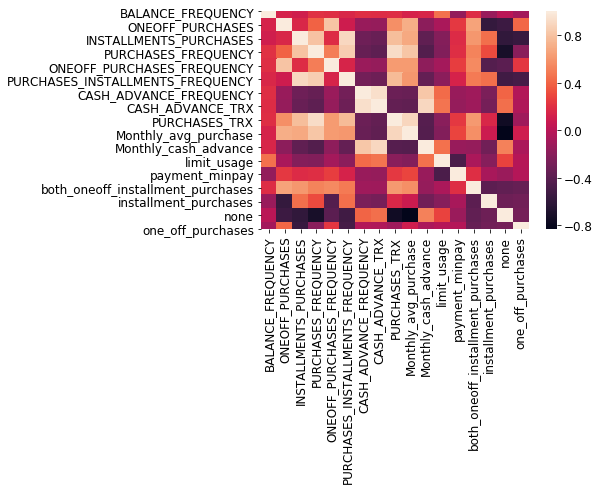

In [53]:
sns.heatmap(df_dummy.corr())

<big>
- Heat map shows that many features are co-related so applying dimensionality reduction will help negating multi-colinearity in data
</big>


- Before applying Principal component analysis(PCA) we will standardize data  to avoid effect of scale on our result. Centering and Scaling will make all features with equal weight.

### Standardrizing data 
- To put data on the same scale 

In [54]:
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()

In [55]:
df_dummy.shape

(8950, 17)

In [56]:
df_scaled=sc.fit_transform(df_dummy)
df_scaled

array([[-0.149, -0.987,  0.394, ...,  1.721, -0.544, -0.515],
       [ 0.18 , -0.987, -1.087, ..., -0.581,  1.839, -0.515],
       [ 0.493,  1.062, -1.087, ..., -0.581, -0.544,  1.943],
       ...,
       [-0.093, -0.987,  0.528, ...,  1.721, -0.544, -0.515],
       [-0.093, -0.987, -1.087, ..., -0.581,  1.839, -0.515],
       [-0.734,  1.169, -1.087, ..., -0.581, -0.544,  1.943]])

### Applying PCA

**With the help of principal component analysis we will reduce features**

In [57]:
from sklearn.decomposition import PCA

In [58]:
df_dummy.shape

(8950, 17)

In [59]:
#We have 17 features therefore taking n_component as 17.
pc=PCA(n_components=17)
df_pca=pc.fit(df_scaled)

In [60]:
#Lets check if we will take 17 component then how much variance it explain. Ideally it should be 1 i.e 100%
sum(df_pca.explained_variance_ratio_)

1.0

In [61]:
var_ratio={}
for n in range(0,18):
    pc=PCA(n_components=n)
    df_pca=pc.fit(df_scaled)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)

In [62]:
var_ratio

{0: 0,
 1: 0.4020578691094781,
 2: 0.5826439793960286,
 3: 0.7299379309512694,
 4: 0.8115442762351256,
 5: 0.8770555795291426,
 6: 0.9186492443512615,
 7: 0.9410925256030123,
 8: 0.9616114053683062,
 9: 0.9739787081990642,
 10: 0.9835896584630708,
 11: 0.9897248107341953,
 12: 0.9927550009135226,
 13: 0.9953907562385426,
 14: 0.9979616898169595,
 15: 0.9996360473172956,
 16: 1.0,
 17: 1.0}

***Since 6 components are explaining about 90% variance so we select 5 components***

In [63]:
pc=PCA(n_components=6)

In [64]:
p=pc.fit(df_scaled)

In [65]:
df_scaled.shape

(8950, 17)

In [66]:
p.explained_variance_

array([6.836, 3.07 , 2.504, 1.387, 1.114, 0.707])

In [67]:
np.sum(p.explained_variance_)

15.618782269308811

In [68]:
np.sum(p.explained_variance_)

15.618782269308811

In [69]:
var_ratio

{0: 0,
 1: 0.4020578691094781,
 2: 0.5826439793960286,
 3: 0.7299379309512694,
 4: 0.8115442762351256,
 5: 0.8770555795291426,
 6: 0.9186492443512615,
 7: 0.9410925256030123,
 8: 0.9616114053683062,
 9: 0.9739787081990642,
 10: 0.9835896584630708,
 11: 0.9897248107341953,
 12: 0.9927550009135226,
 13: 0.9953907562385426,
 14: 0.9979616898169595,
 15: 0.9996360473172956,
 16: 1.0,
 17: 1.0}

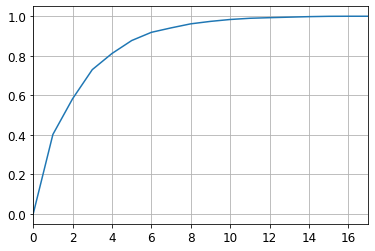

In [70]:
pd.Series(var_ratio).plot()
plt.grid(True)

***Since 5 components are explaining about 87% variance so we select 5 components***

In [71]:
df_scaled.shape

(8950, 17)

In [72]:
pc_final=PCA(n_components=6).fit(df_scaled)

reduced_df=pc_final.fit_transform(df_scaled)

In [73]:
df1=pd.DataFrame(reduced_df)

In [74]:
df1.head()

,0,1,2,3,4,5
0,-0.242841,-2.759668,0.343061,-0.417359,-0.007100,0.019755
1,-3.975652,0.144625,-0.542989,1.023832,-0.428929,-0.572463
2,1.287396,1.508938,2.709966,-1.892252,0.010809,-0.599932
3,-1.047613,0.673103,2.501794,-1.306784,0.761348,1.408986
4,-1.451586,-0.176336,2.286074,-1.624896,-0.561969,-0.675214


***So initially we had 17 variables now its 5 so our variable go reduced***

In [75]:
df1.shape

(8950, 6)

In [76]:
col_list=df_dummy.columns

In [77]:
col_list

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay',
       'both_oneoff_installment_purchases', 'installment_purchases', 'none',
       'one_off_purchases'],
      dtype='object')

In [78]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(6)],index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5
BALANCE_FREQUENCY,0.029707,0.240072,-0.263140,-0.353549,-0.228681,-0.693816
ONEOFF_PURCHASES,0.214107,0.406078,0.239165,0.001520,-0.023197,0.129094
INSTALLMENTS_PURCHASES,0.312051,-0.098404,-0.315625,0.087983,-0.002181,0.115223
PURCHASES_FREQUENCY,0.345823,0.015813,-0.162843,-0.074617,0.115948,-0.081879
ONEOFF_PURCHASES_FREQUENCY,0.214702,0.362208,0.163222,0.036303,-0.051279,-0.097299
PURCHASES_INSTALLMENTS_FREQUENCY,0.295451,-0.112002,-0.330029,0.023502,0.025871,0.006731
CASH_ADVANCE_FREQUENCY,-0.214336,0.286074,-0.278586,0.096353,0.360132,0.066589
CASH_ADVANCE_TRX,-0.229393,0.291556,-0.285089,0.103484,0.332753,0.082307
PURCHASES_TRX,0.355503,0.106625,-0.102743,-0.054296,0.104971,-0.009402
Monthly_avg_purchase,0.345992,0.141635,0.023986,-0.079373,0.194147,0.015878


#### So above data gave us eigen vector for each component we had all eigen vector value very small we can remove those variable bur in our case its not.

In [79]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(6)])

PC_0    0.402058
PC_1    0.180586
PC_2    0.147294
PC_3    0.081606
PC_4    0.065511
PC_5    0.041594
dtype: float64

### Clustering

**Based on the intuition on type of purchases made by customers and their distinctive behavior exhibited based on the purchase_type (as visualized above in Insights from KPI) , I am starting with 4 clusters.**

In [80]:
from sklearn.cluster import KMeans

In [94]:
km=KMeans(n_clusters=4,random_state=123)

In [95]:
km.fit(reduced_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [96]:
km.labels_

array([2, 1, 0, ..., 2, 1, 0])

In [84]:
pd.Series(km.labels_).value_counts()

3    2769
2    2224
1    2088
0    1869
dtype: int64

***Here we donot have known k value so we will find the K. To do that we need to take a cluster range between 1 and 21.*** 

*Elbow Diagram can show it with clear picture of no.of clusters formed*

### Identify cluster Error.

In [85]:
cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit(reduced_df)
    cluster_errors.append( clusters.inertia_ )# clusters.inertia_ is basically cluster error here.

In [86]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df

,num_clusters,cluster_errors
0,1,139772.482528
1,2,93307.514916
2,3,70747.624157
3,4,49446.066485
4,5,42548.483096
5,6,37712.952211
6,7,34124.450080
7,8,31285.564791
8,9,28602.588156
9,10,26302.829706


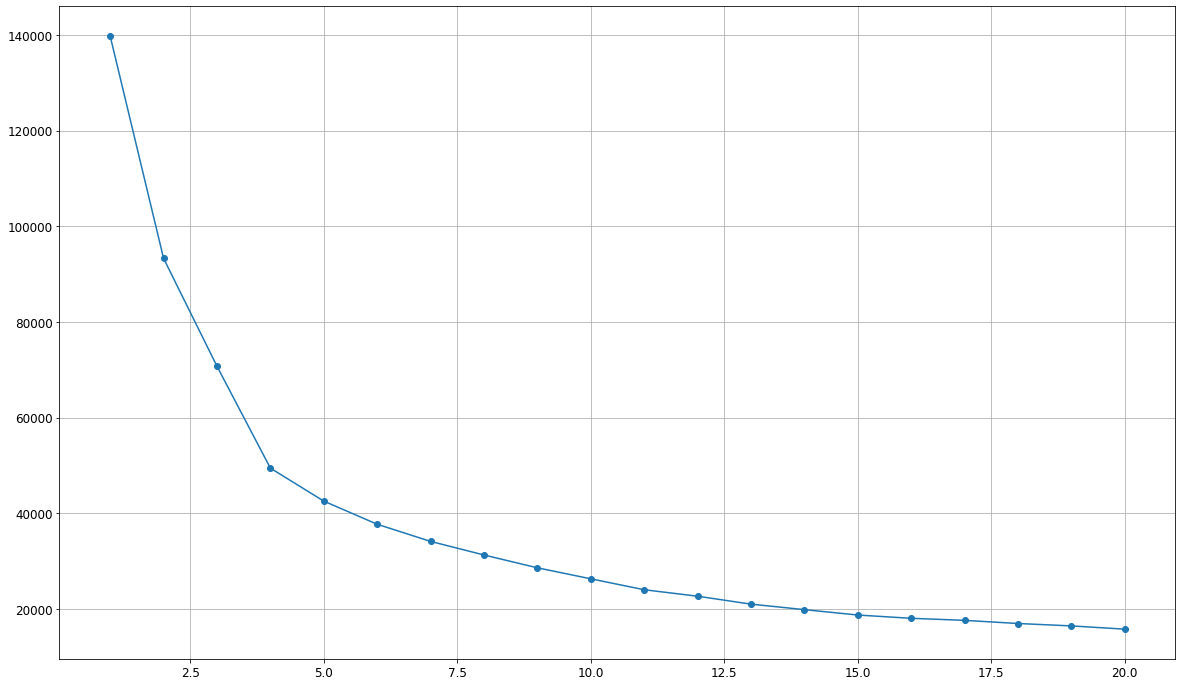

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.grid(True)

***From above graph we will find elbow diagram shows that no.of custers=4***

### Silhouette Coefficient

In [89]:
from sklearn import metrics

In [90]:
# calculate SC for K=3 through K=12
k_range = range(2, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(reduced_df)
    scores.append(metrics.silhouette_score(reduced_df, km.labels_))

In [91]:
scores

[0.3325416708597948,
 0.3543791293507386,
 0.437085774396595,
 0.43121145209717776,
 0.4220467595737723,
 0.40217785765526687,
 0.4180916253914015,
 0.39041327773538415,
 0.36496505692492187,
 0.36790496081831997,
 0.3663758741223298,
 0.3405913171045802,
 0.3528765404198072,
 0.3422655486472436,
 0.33719924839899756,
 0.33775014901014716,
 0.321451223252131,
 0.3233079388517471,
 0.3151919362737485]

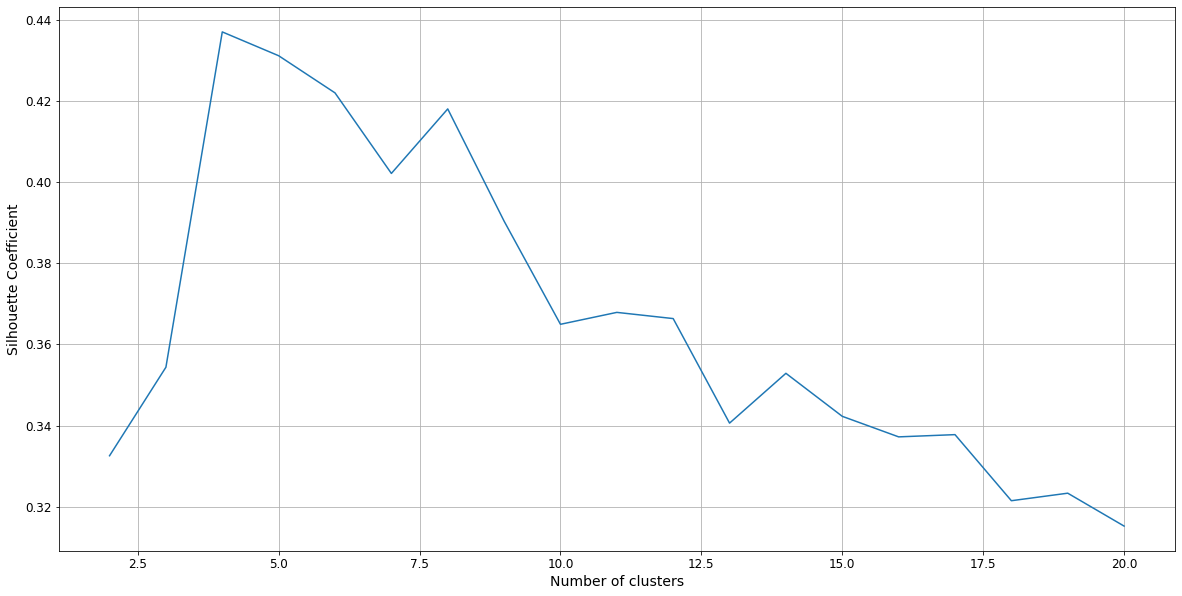

In [98]:
# plot the results
plt.figure(figsize=(20,10))
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

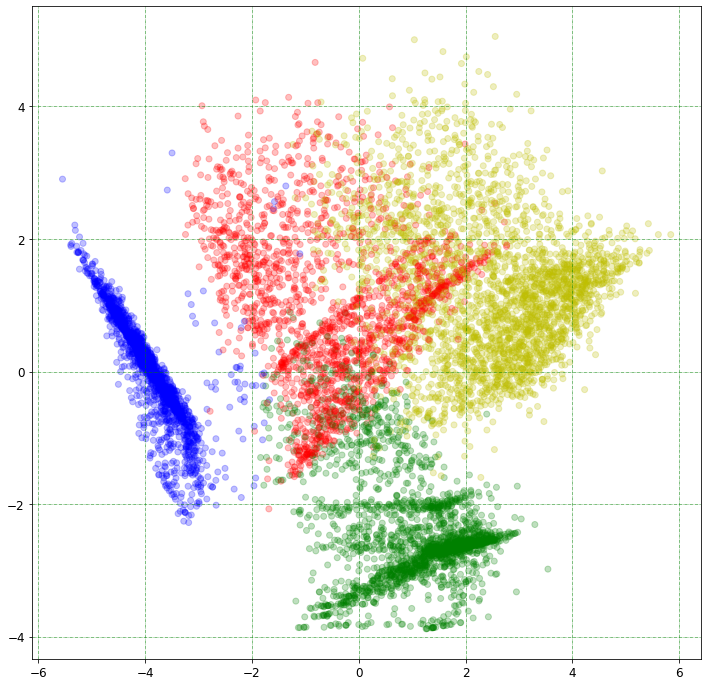

In [97]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[x] for x in km.labels_]
plt.figure(figsize=(12,12))
plt.scatter(reduced_df[:,0],reduced_df[:,1],c=label_color,cmap='Spectral',alpha=0.25)
plt.grid(color='g', linestyle='-.', linewidth=0.5)

***It is very difficult to draw individual plot for cluster, so we will use pair plot which will provide us all graph in one shot. To do that we need to take following steps***

In [99]:
reduced_df

array([[-2.428e-01, -2.760e+00,  3.431e-01, -4.174e-01, -7.100e-03,
         1.975e-02],
       [-3.976e+00,  1.446e-01, -5.430e-01,  1.024e+00, -4.289e-01,
        -5.725e-01],
       [ 1.287e+00,  1.509e+00,  2.710e+00, -1.892e+00,  1.081e-02,
        -5.999e-01],
       ...,
       [ 1.156e+00, -2.799e+00, -5.363e-01, -6.812e-01,  3.257e-01,
         1.936e-03],
       [-3.250e+00, -1.016e+00,  4.738e-01,  8.156e-01, -1.125e+00,
        -3.795e-02],
       [ 2.388e-01,  2.223e+00,  1.840e+00, -1.108e+00,  1.746e+00,
         7.803e-01]])

In [100]:
df_pair_plot=pd.DataFrame(reduced_df,columns=['PC_' +str(i) for i in range(6)])

In [101]:
#Adding cluster column in the data frame
df_pair_plot['Cluster']=km.labels_ 

In [102]:
df_pair_plot.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,Cluster
0,-0.242841,-2.759668,0.343061,-0.417359,-0.007100,0.019755,2
1,-3.975652,0.144625,-0.542989,1.023832,-0.428929,-0.572463,1
2,1.287396,1.508938,2.709966,-1.892252,0.010809,-0.599932,0
3,-1.047613,0.673103,2.501794,-1.306784,0.761348,1.408986,0
4,-1.451586,-0.176336,2.286074,-1.624896,-0.561969,-0.675214,0


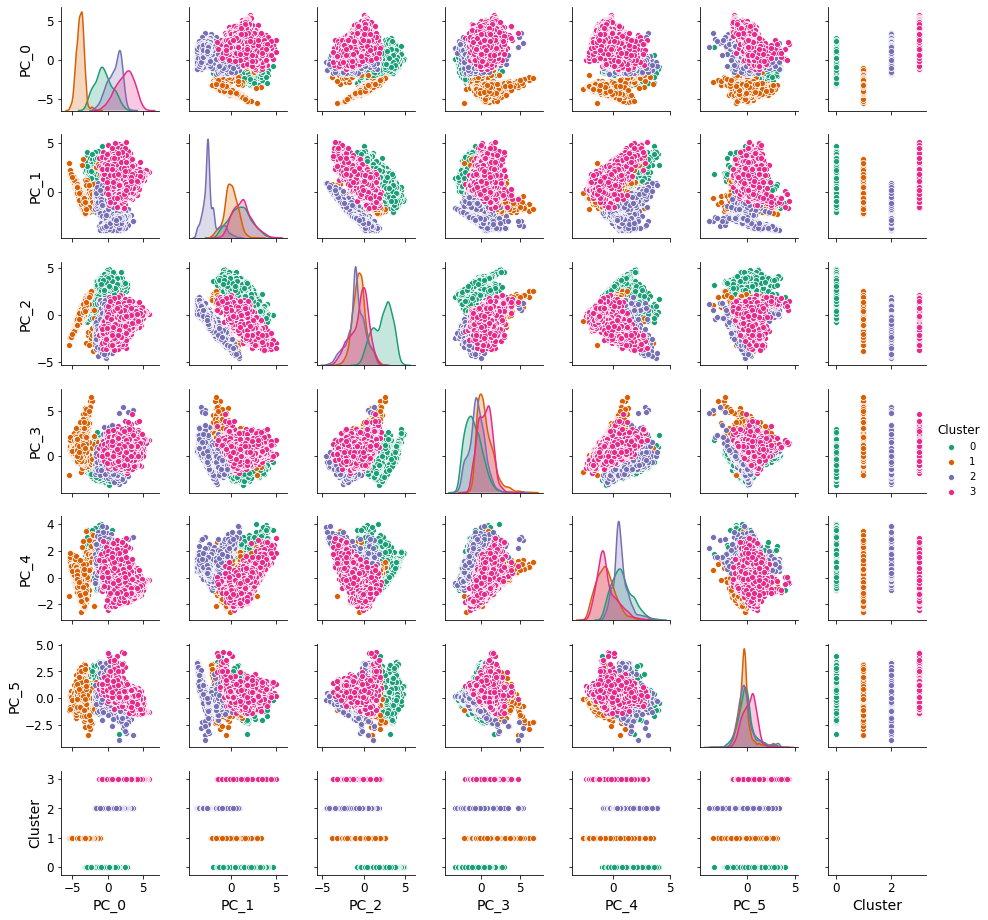

In [103]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

***It shows that first two components are able to identify clusters***

#### Now we have done here with principle component now we need to come bring our original data frame and we will merge the cluster with them. 

***To interpret result we need to use our data frame***

In [104]:
# Key performace variable selection . here i am taking varibales which we will use in derving new KPI. 
#We can take all 17 variables but it will be difficult to interpret.So are are selecting less no of variables.

col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','both_oneoff_installment_purchases','installment_purchases','one_off_purchases','none','CREDIT_LIMIT']

In [105]:
df_pre.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.619940,3.204274,3.352403,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,3.050877,2.163970,0.296081,1.357600
std,0.148590,3.246365,3.082973,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,0.000000,0.040656,0.648817
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,0.000000,0.264455,1.109459
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.606022,0.540911,1.953415
max,0.693147,10.615512,10.021315,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,8.315721,8.276166,2.827902,8.830767


In [106]:
df_original


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,purchase_type,limit_usage,payment_minpay,both_oneoff_installment_purchases,installment_purchases,none,one_off_purchases
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,installment_purchases,0.040901,1.446508,0,1,0,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,none,0.457495,3.826241,0,0,1,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,one_off_purchases,0.332687,0.991682,0,0,0,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,one_off_purchases,0.222223,0.000000,0,0,0,1
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,one_off_purchases,0.681429,2.771075,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,48.520000,0.000000,installment_purchases,0.028494,6.660231,0,1,0,0
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6,50.000000,0.000000,installment_purchases,0.019183,0.883197,0,1,0,0
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,24.066667,0.000000,installment_purchases,0.023399,0.986076,0,1,0,0
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0.000000,6.093130,none,0.026915,0.942505,0,0,1,0


In [107]:
# Con-catenating labels found through Kmeans with data 
cluster_df_4=pd.concat([df_original[col_kpi],pd.Series(km.labels_,name='Cluster_4')],axis=1)

In [108]:
cluster_df_4.head()

,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,CASH_ADVANCE_TRX,payment_minpay,both_oneoff_installment_purchases,installment_purchases,one_off_purchases,none,CREDIT_LIMIT,Cluster_4
0,2,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,2
1,0,0.000000,536.912124,0.457495,4,3.826241,0,0,0,1,7000.0,1
2,12,64.430833,0.000000,0.332687,0,0.991682,0,0,1,0,7500.0,0
3,1,124.916667,17.149001,0.222223,1,0.000000,0,0,1,0,7500.0,0
4,1,1.333333,0.000000,0.681429,0,2.771075,0,0,1,0,1200.0,0


In [109]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_4=cluster_df_4.groupby('Cluster_4').apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,7.127341,0.043582,12.062050,33.013723
Monthly_avg_purchase,69.875917,0.148297,47.626256,193.008043
Monthly_cash_advance,78.098613,186.281319,33.550080,67.466910
limit_usage,0.379761,0.576076,0.264745,0.353591
CASH_ADVANCE_TRX,2.881220,6.540230,1.021133,2.804261
payment_minpay,5.573672,9.936617,13.422420,7.245651
both_oneoff_installment_purchases,0.000535,0.001916,0.000000,1.000000
installment_purchases,0.000000,0.017241,1.000000,0.000000
one_off_purchases,0.999465,0.002874,0.000000,0.000000
none,0.000000,0.977969,0.000000,0.000000


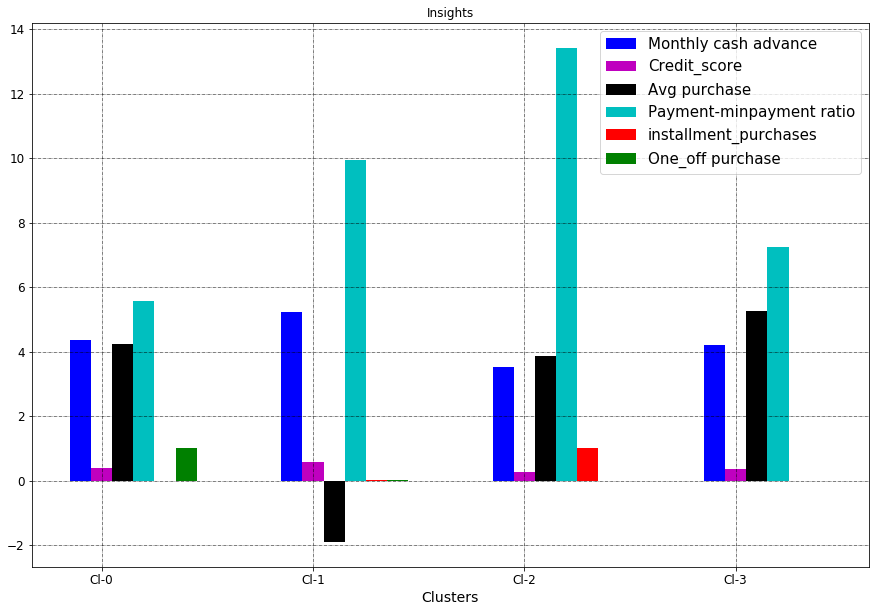

In [110]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['installment_purchases',:].values
one_off=cluster_4.loc['one_off_purchases',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment_purchases',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Clusters")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend(fontsize=15)
plt.grid(color='black', linestyle='-.', linewidth=0.5)

**Insights**

#### Clusters are clearly distinguishing behavior within customers




<big>


- Cluster 2 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off   purchases, have comparatively good credit score. *** This group is about 31% of the total customer base ***
 

 
- cluster 1 is taking maximum advance_cash  and   is paying comparatively less minimum payment and poor credit_score & doing no purchase transaction. *** This group is about 23% of the total customer base ***



- Cluster 0 customers are doing maximum One_Off transactions  and  least payment ratio. *** This group is about 21% of the total customer base ***



- Cluster 3 customers have maximum credit score and  are paying dues and are doing maximum installment purchases. *** This group is about 25% of the total customer base ***


---



In [111]:
# Percentage of each cluster in the total customer base
s=cluster_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
print (s),'\n'

per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print ("Cluster -4 "),'\n'
print (pd.concat([pd.Series(s.values,name='Size'),per],axis=1))

Cluster_4   
0          0    1869
1          1    2088
2          2    2224
3          3    2769
Name: Cluster_4, dtype: int64
Cluster -4 
   Size  Percentage
0  1869   20.882682
1  2088   23.329609
2  2224   24.849162
3  2769   30.938547



### Checking performance metrics for Kmeans
- I am validating performance with 2 metrics Calinski harabaz and Silhouette score

In [112]:
from sklearn.metrics import calinski_harabaz_score,silhouette_score

In [113]:
score_s={}
score_c_h={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(reduced_df)
    score_c_h[n]=calinski_harabaz_score(reduced_df,km_score.labels_)
    score_s[n]=silhouette_score(reduced_df,km_score.labels_)

I:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
I:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
I:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
I:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_

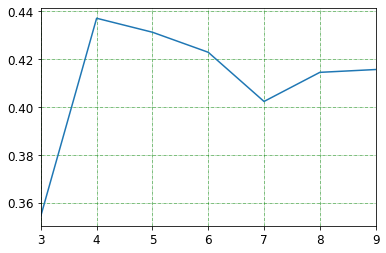

In [114]:
pd.Series(score_s).plot()
plt.grid(color='g', linestyle='-.', linewidth=0.5)

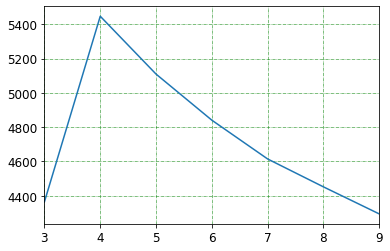

In [115]:
pd.Series(score_c_h).plot()
plt.grid(color='g', linestyle='-.', linewidth=0.5)

**Performance metrics also suggest that  K-means with 4 cluster is able to show distinguished characteristics of each cluster.**




***Insights with 4 Clusters***




- Cluster 0 customers are doing maximum One_Off transactions  and  least payment ratio and credit_score on lower side ***This group is about 21% of the total customer base***
 
 
 
- Cluster 1 is taking maximum advance_cash  and   is paying comparatively less minimum payment and poor credit_score & doing no purchase transaction. ***This group is about 23% of the total customer base***



- Cluster 2 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off   purchases, have comparatively good credit score. ***This group is about 31% of the total customer base ***



- Cluster 3 customers have maximum credit score and  are paying dues and are doing maximum installment purchases.*** This group is about 25% of the total customer base***



## Marketing Strategy Suggested:


### Group 1 (Cluster 0)
   - This group is has minimum paying ratio and using card for just oneoff transactions (may be for utility bills only). This group seems to be risky group.
   
          
### Group 2 (Cluster 1)
   - They have poor credit score and taking only cash on advance. We can target them by providing  less interest rate on purchase transaction
   

### Group 3 (Cluster 2)
   - They are potential target customers who are paying dues and doing purchases and maintaining comparatively good credit score, so we should focus on increasing the sales from them by 
       --    Increasing credit limit or can lower down interest rate
       --    Issuing premium card /loyality cards to increase transactions   
       
   
### Group 4 (Cluster 3)
  - This group is performing best among all as cutomers are maintaining good credit score and paying dues on time.
      -- Giving rewards point will make them perform more purchases.
       